# Chapter10 Ex - 3

a) In this problem, you will perform K-means clustering manually, with K=2, 
on a small example with n=6 observations and p=2 features. The observations are as follows.


In [1]:
#a)
x <- cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))

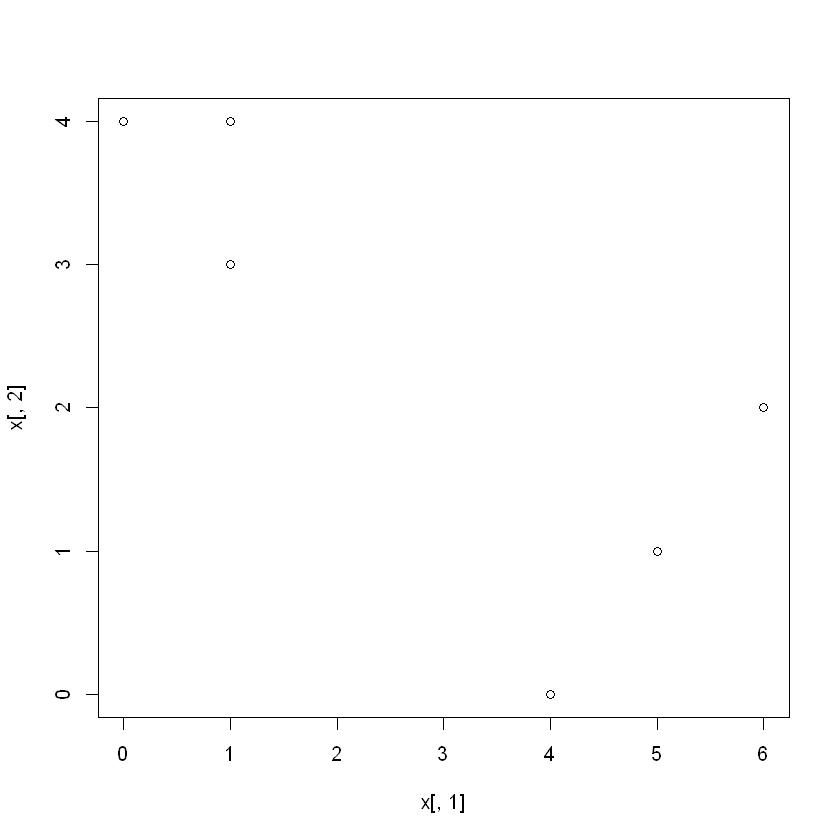

In [2]:
plot(x[,1], x[,2])

In [3]:
#b)
set.seed(123)
labels <- sample(2, nrow(x), replace = T)
labels

[1] 1 1 1 2 1 2

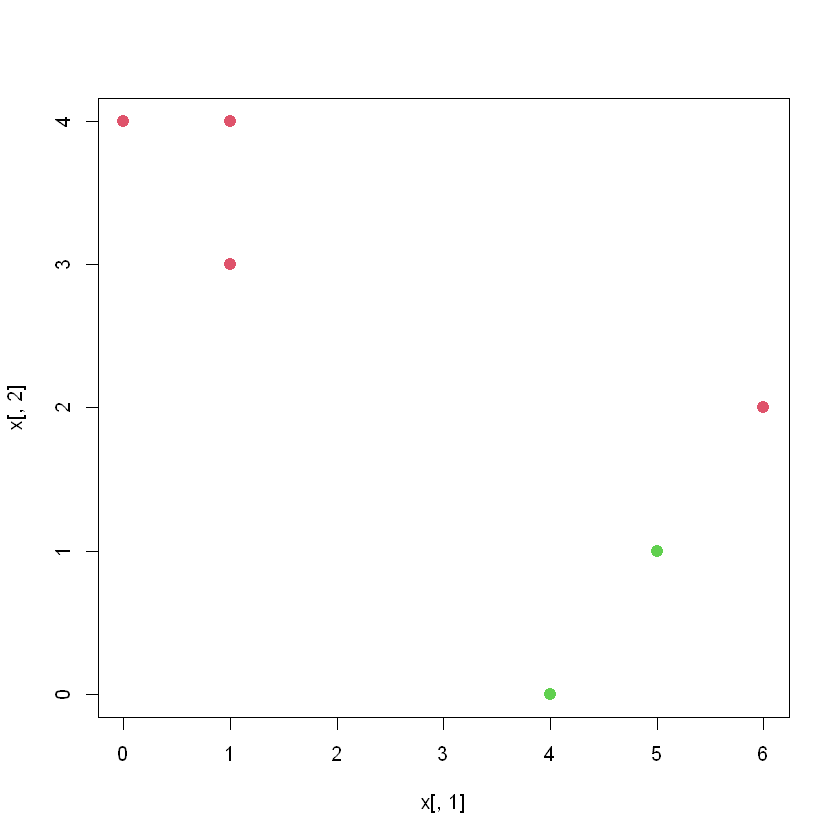

In [4]:
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)

In [9]:
#c) 
centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))


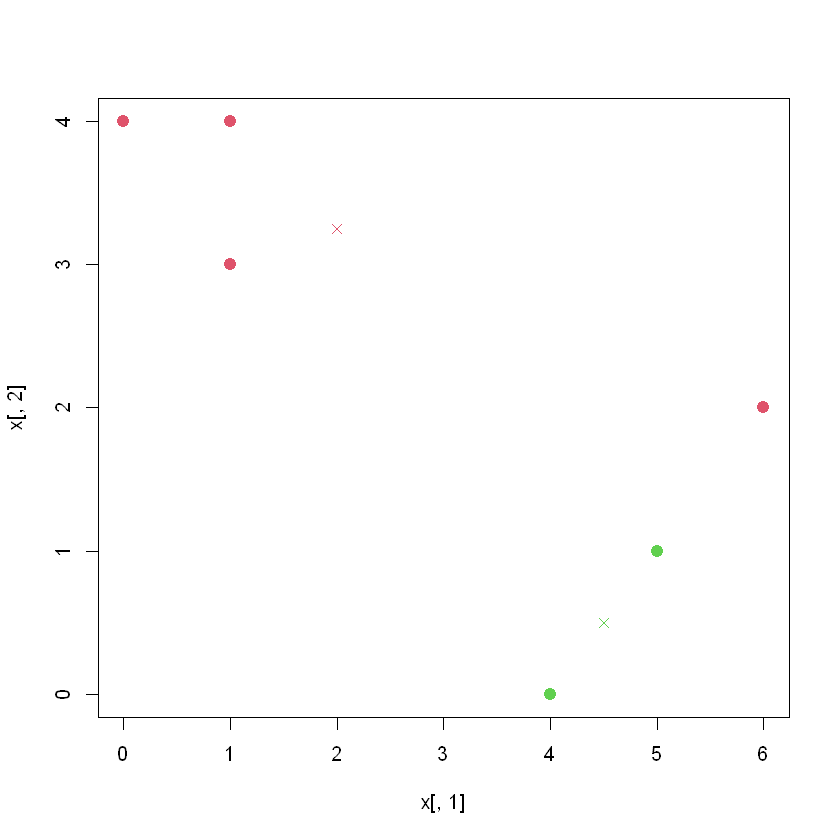

In [10]:
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

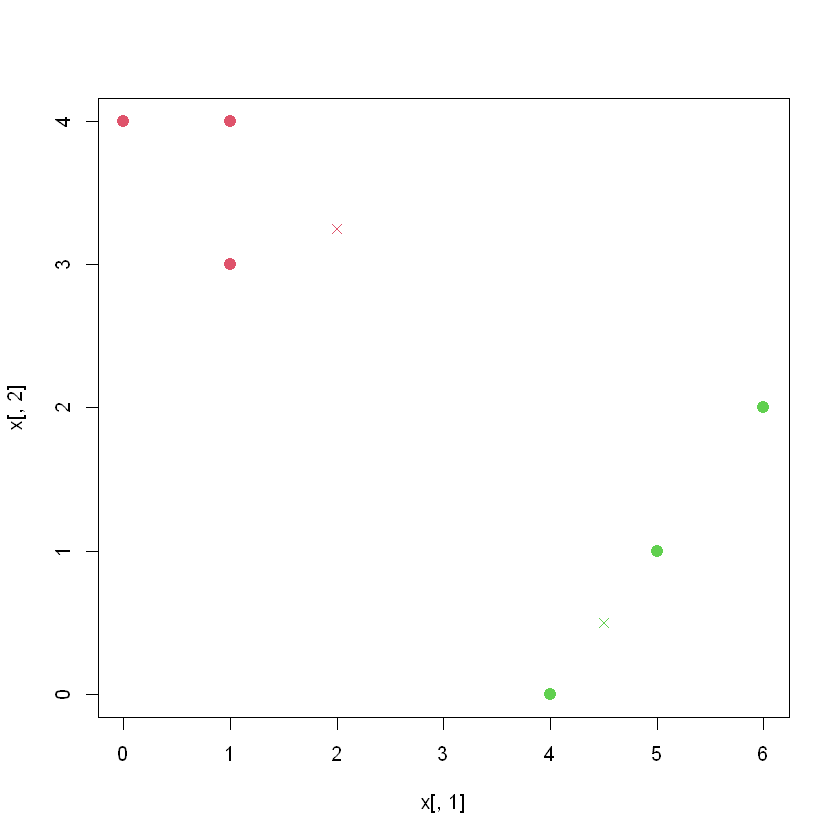

In [11]:
#d) 

labels <- c(1, 1, 1, 2, 2, 2)
plot(x[, 1], x[, 2], col = (labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

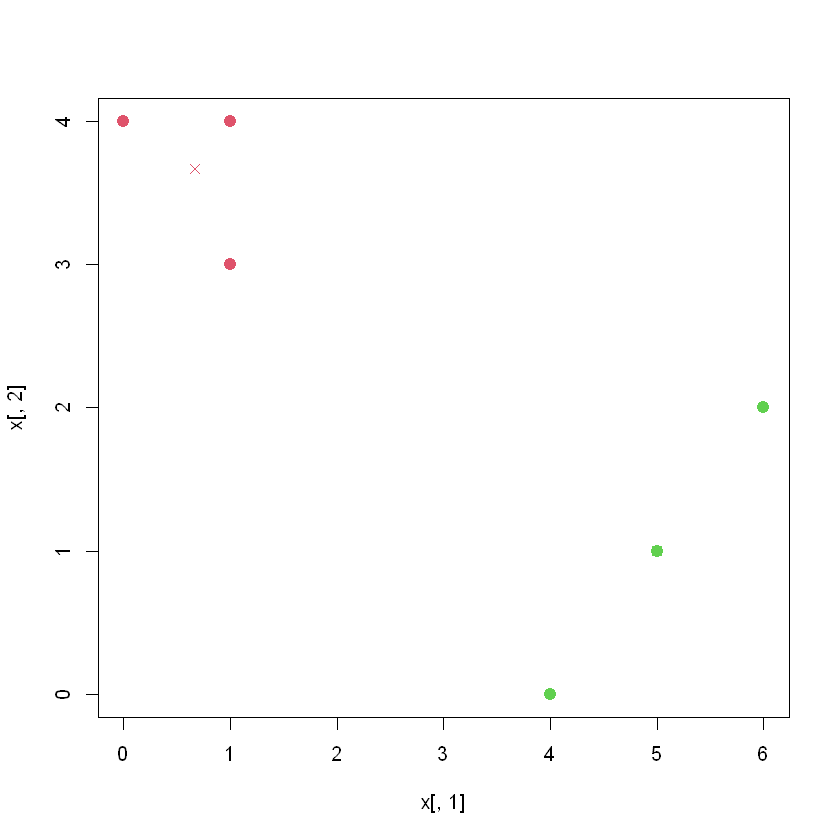

In [12]:
#e) 

centroid1 <- c(mean(x[labels == 1, 1]), mean(x[labels == 1, 2]))
centroid2 <- c(mean(x[labels == 2, 1]), mean(x[labels == 2, 2]))
plot(x[,1], x[,2], col=(labels + 1), pch = 20, cex = 2)
points(centroid1[1], centroid1[2], col = 2, pch = 4)
points(centroid2[1], centroid2[2], col = 3, pch = 4)

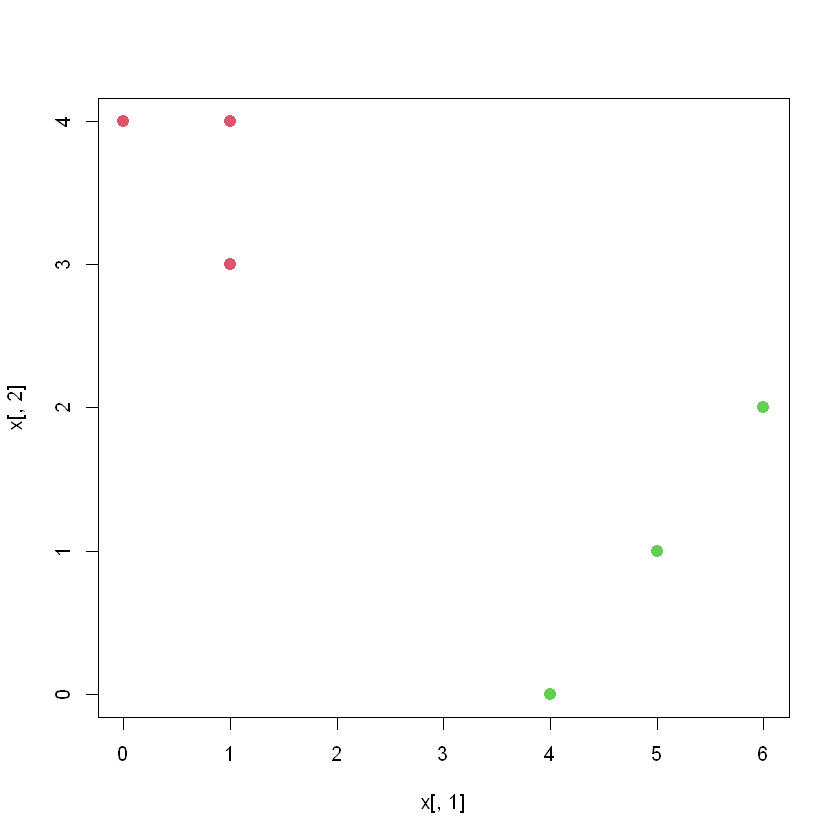

In [13]:
#f) In your plot from (a), color the observations according to the clusters labels obtained.

plot(x[, 1], x[, 2], col=(labels + 1), pch = 20, cex = 2)

# Chapter 10 EX - 8 

In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the 
PVE can be obtained using the “sdev” output of the “prcomp()” function. On the “USArrests” data, calculate PVE in two ways :

In [14]:
#a) 
pr.out <- prcomp(USArrests, scale = TRUE)
pr.var <- pr.out$sdev^2
pve <- pr.var / sum(pr.var)
sum(pr.var)

[1] 4

In [15]:
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [17]:
#b) 
loadings <- pr.out$rotation
USArrests2 <- scale(USArrests)

In [18]:
sumvar <- sum(apply(as.matrix(USArrests2)^2, 2, sum))
apply((as.matrix(USArrests2) %*% loadings)^2, 2, sum) / sumvar

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

# Chapter 10 EX - 9

 Consider the “USArrests” data. We will now perform hierarchical clustering on the states.

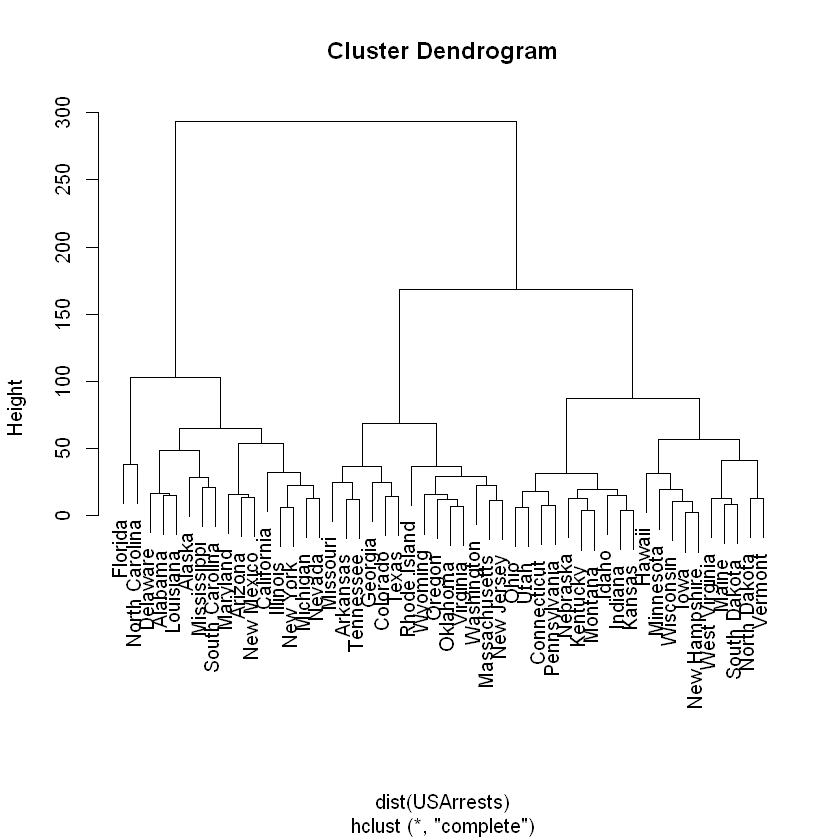

In [20]:
#a) 

set.seed(123)
hc.complete <- hclust(dist(USArrests), method = "complete")
plot(hc.complete)

In [21]:
#b)
cutree(hc.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

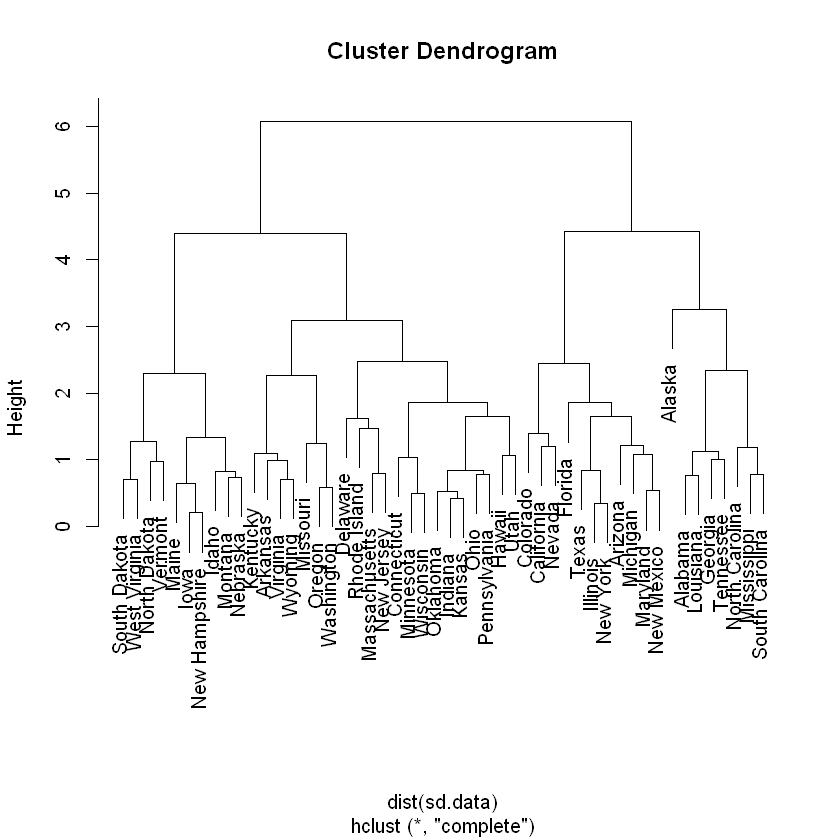

In [22]:
#c) 

sd.data <- scale(USArrests)
hc.complete.sd <- hclust(dist(sd.data), method = "complete")
plot(hc.complete.sd)

In [23]:
#d) 
cutree(hc.complete.sd, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [24]:
table(cutree(hc.complete, 3), cutree(hc.complete.sd, 3))

   
     1  2  3
  1  6  9  1
  2  2  2 10
  3  0  0 20

Scaling the variables affect the clusters obtained although the trees are somewhat similar. The variables should be scaled beforehand because the data measures have different units.

# Chapter 10 EX - 10

In [25]:
#a)

set.seed(123)
x <- matrix(rnorm(20 * 3 * 50, mean = 0, sd = 0.001), ncol = 50)
x[1:20, 2] <- 1
x[21:40, 1] <- 2
x[21:40, 2] <- 2
x[41:60, 1] <- 1
true.labels <- c(rep(1, 20), rep(2, 20), rep(3, 20))

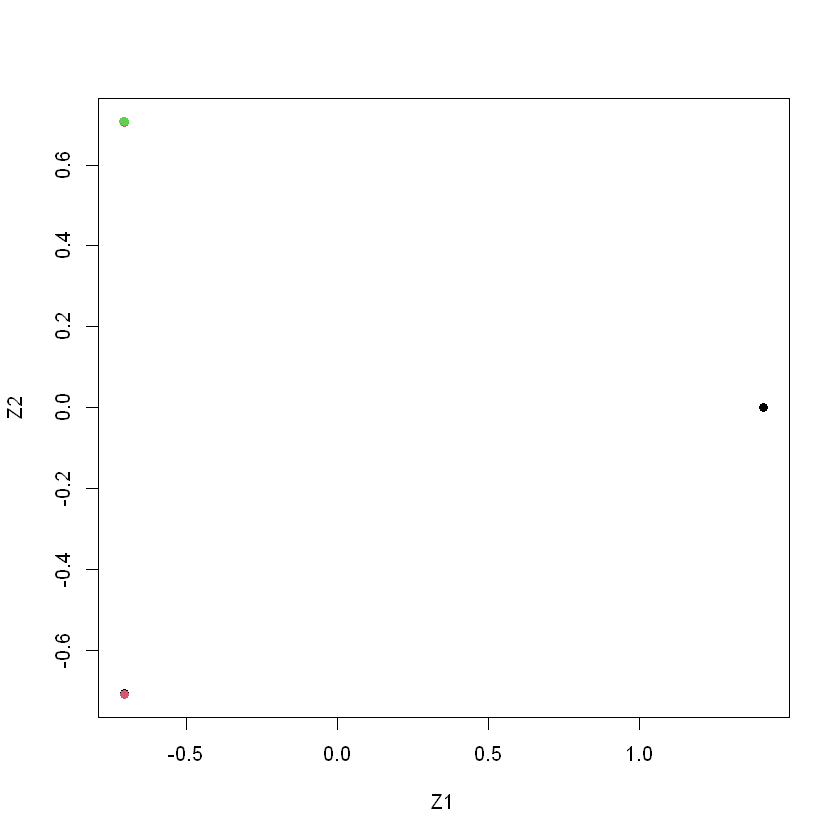

In [26]:
#b)
pr.out <- prcomp(x)
plot(pr.out$x[, 1:2], col = 1:3, xlab = "Z1", ylab = "Z2", pch = 19)

In [29]:
#c) 
km.out <- kmeans(x, 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  0  0 20
          2  0 20  0
          3 20  0  0

They are perfectly clustered

In [30]:
#d)
km.out <- kmeans(x, 2, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2
          1 20  0
          2  0 20
          3 20  0

From 3 -> 2 one of the clusters absorbed the points

In [31]:
#e) 
km.out <- kmeans(x, 4, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3  4
          1  0 20  0  0
          2 20  0  0  0
          3  0  0  9 11

3rd cluster is split into two 

In [32]:
#f)
km.out <- kmeans(pr.out$x[, 1:2], 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  0  0 20
          2 20  0  0
          3  0 20  0

In [33]:
#g) 
km.out <- kmeans(scale(x), 3, nstart = 20)
table(true.labels, km.out$cluster)

           
true.labels  1  2  3
          1  4  6 10
          2  4 13  3
          3  8  3  9

As scaling affects the distance between the observations, we have worse results than with unscaled data